# Import the libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA

from datetime import date

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [2]:
train = pd.read_csv("E:/year3_sem1/COMP4433/competition/train.csv")
test = pd.read_csv("E:/year3_sem1/COMP4433/competition/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data analysis visualization

## Missing Value

In [5]:
def missing_values_table(df):
    missing_values = df.isnull().sum()
    missing_values_percent = (missing_values / len(df)) * 100
    missing_table = pd.concat([missing_values, missing_values_percent], axis=1)
    missing_table.columns = ['Missing Values', 'Percentage']
    missing_table = missing_table[missing_table['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
    return missing_table

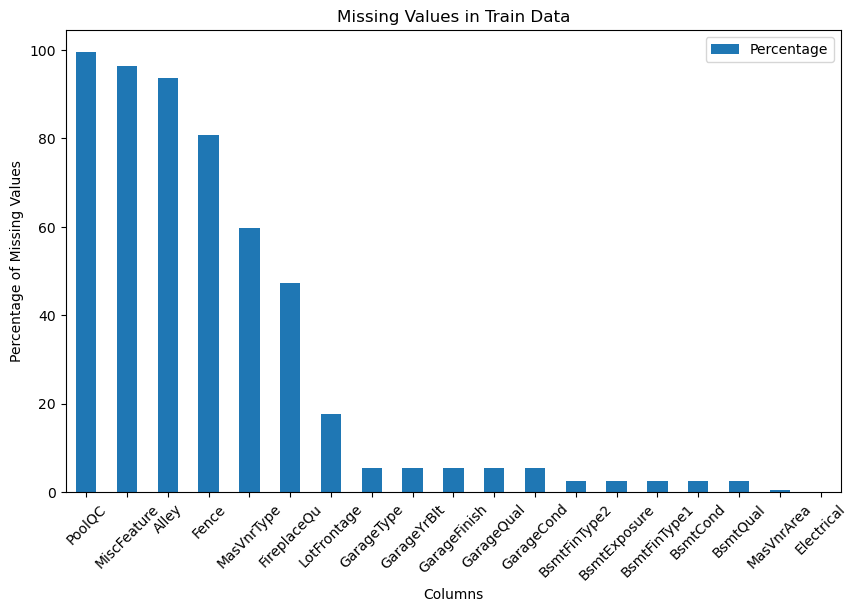

In [6]:
train_missing= missing_values_table(train)
train_missing.plot(kind='bar', y='Percentage', figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values in Train Data')
plt.xticks(rotation=45)
plt.show()

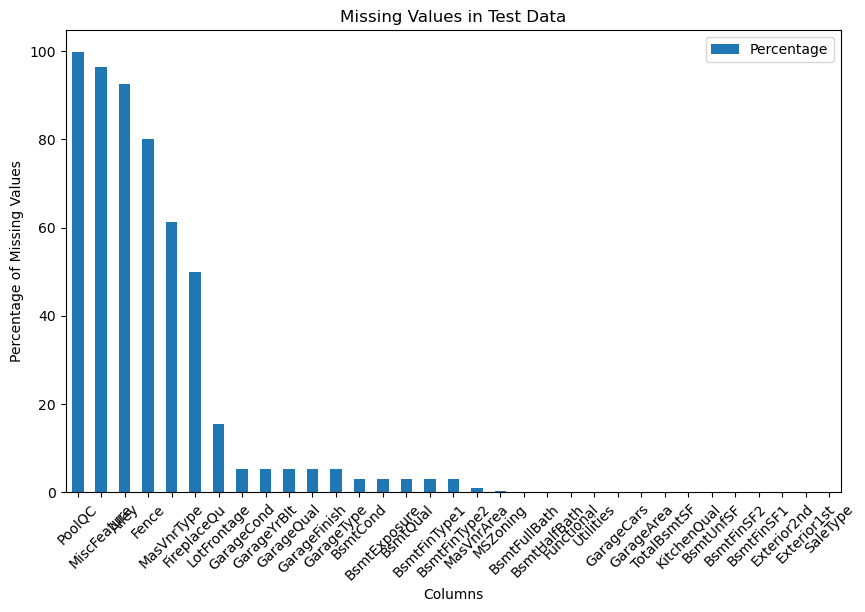

In [7]:
test_missing= missing_values_table(test)
test_missing.plot(kind='bar', y='Percentage', figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values in Test Data')
plt.xticks(rotation=45)
plt.show()

## Categorical columns attribute Analysis

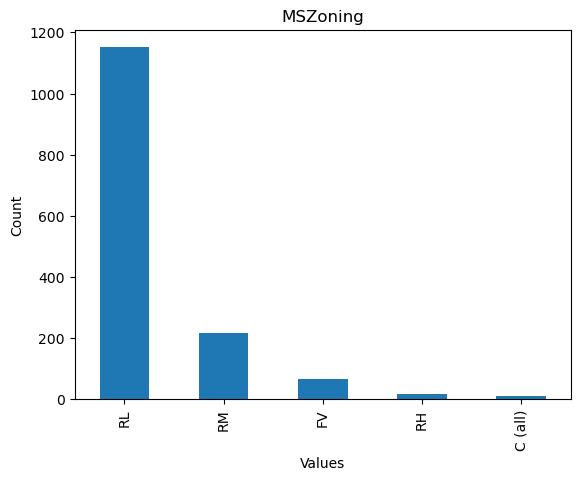

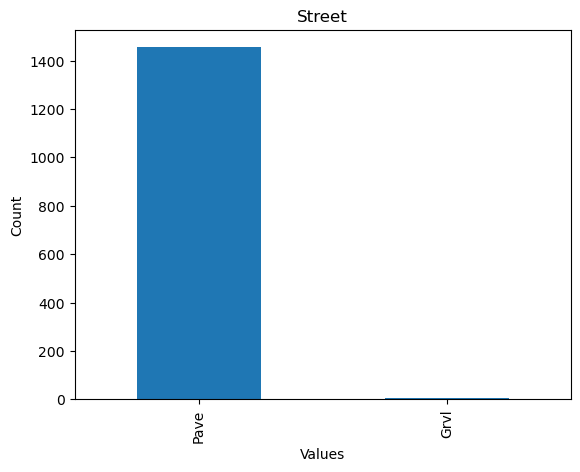

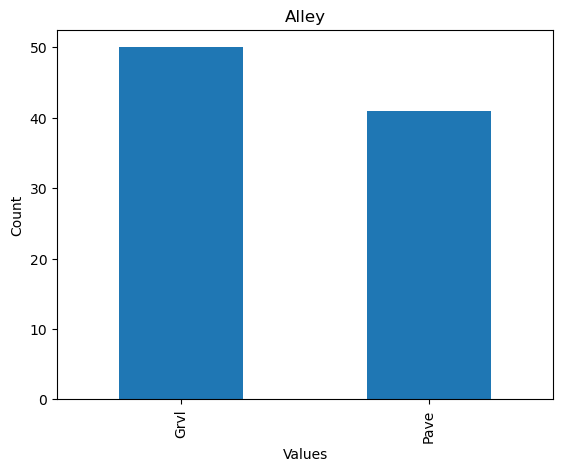

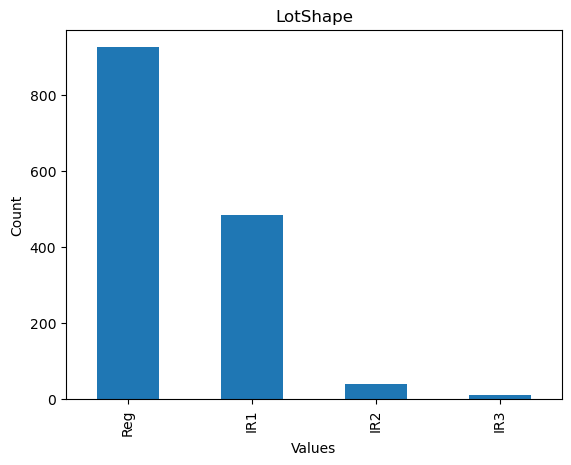

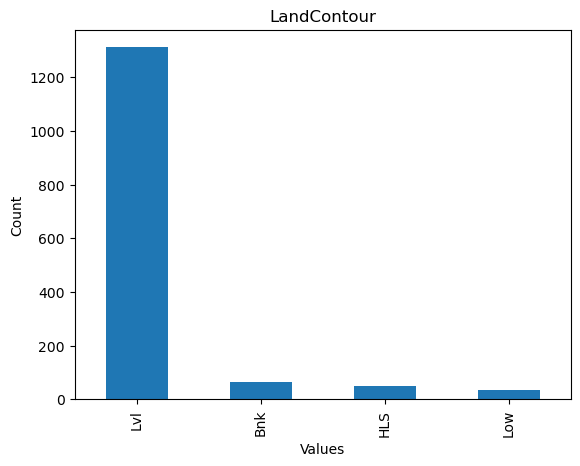

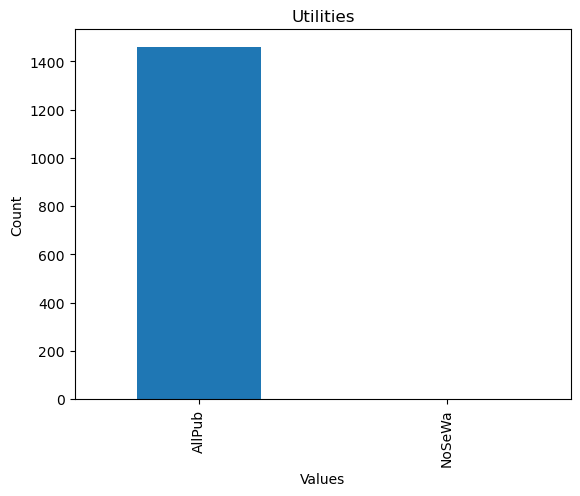

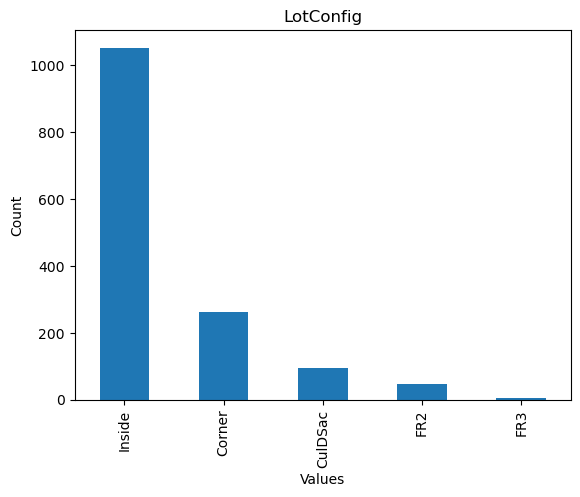

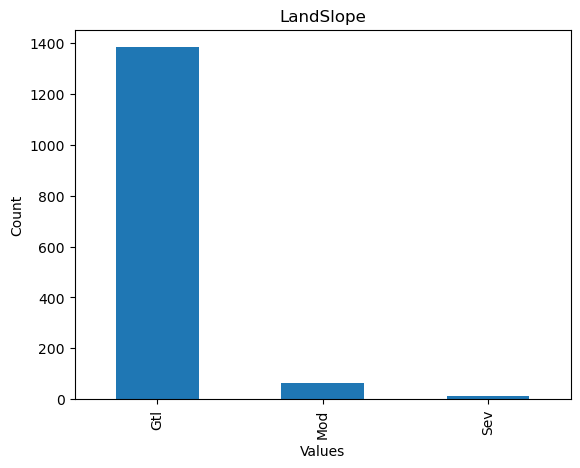

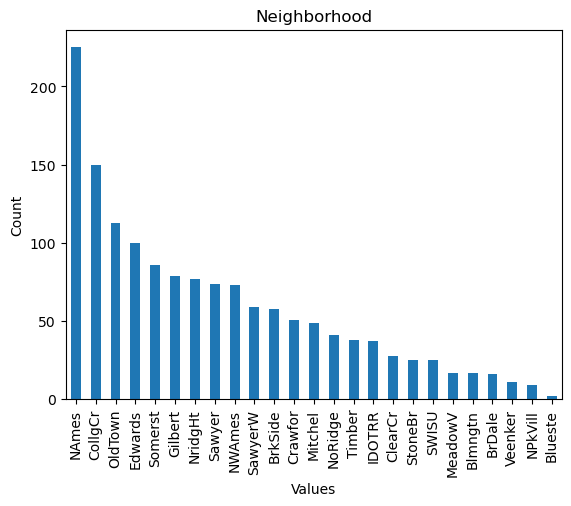

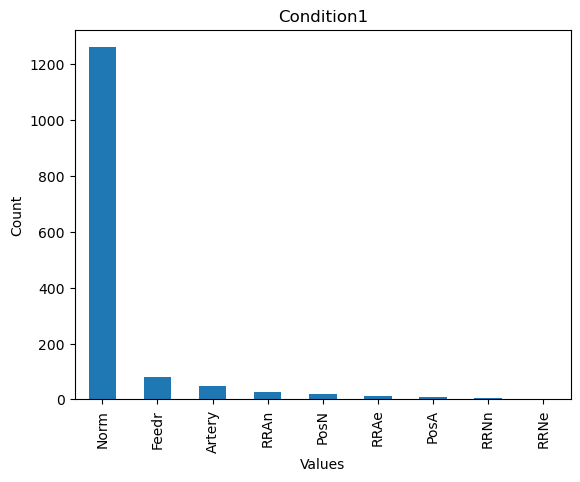

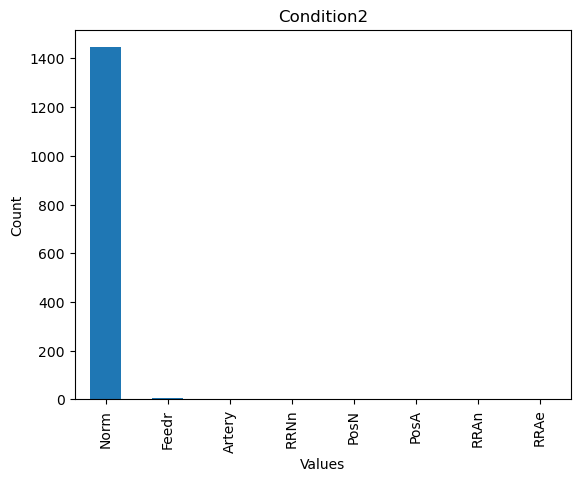

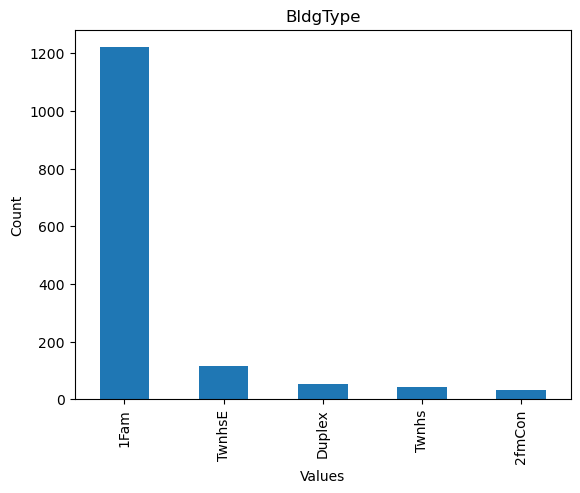

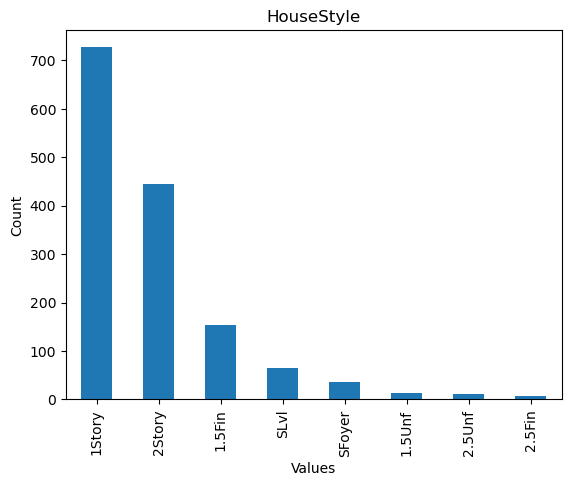

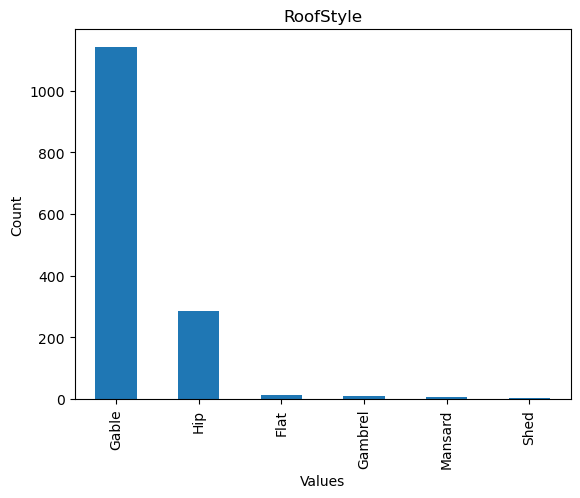

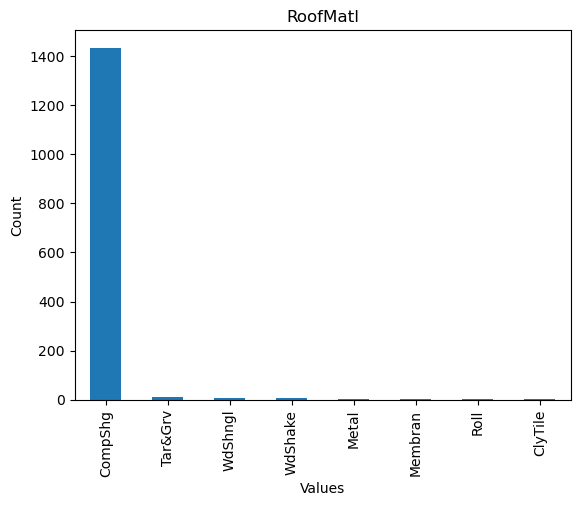

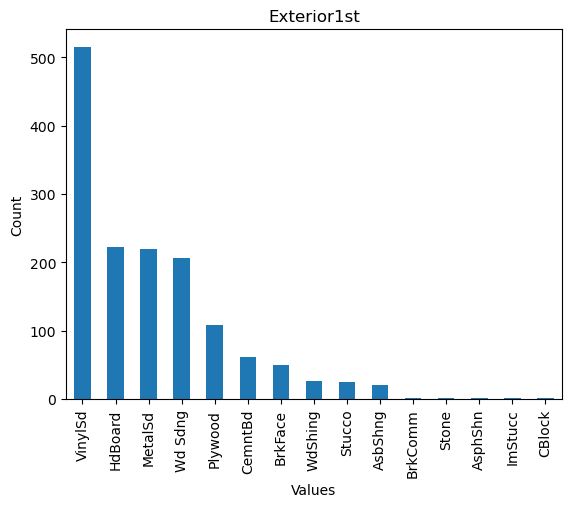

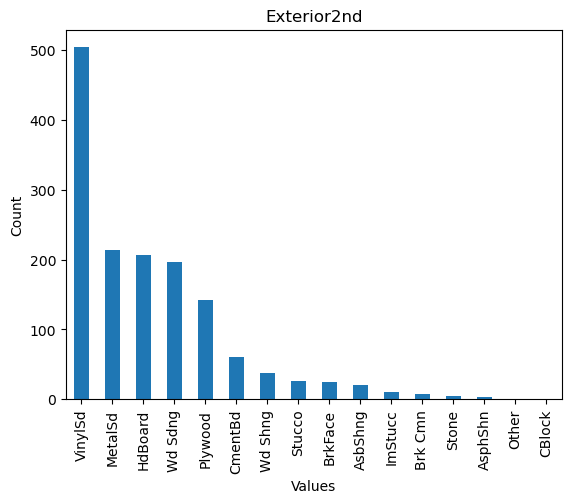

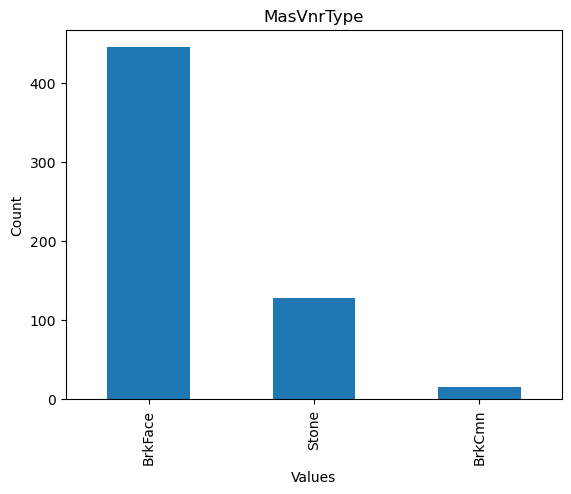

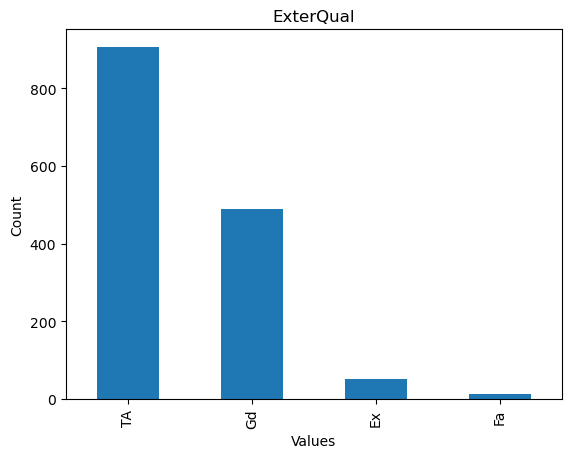

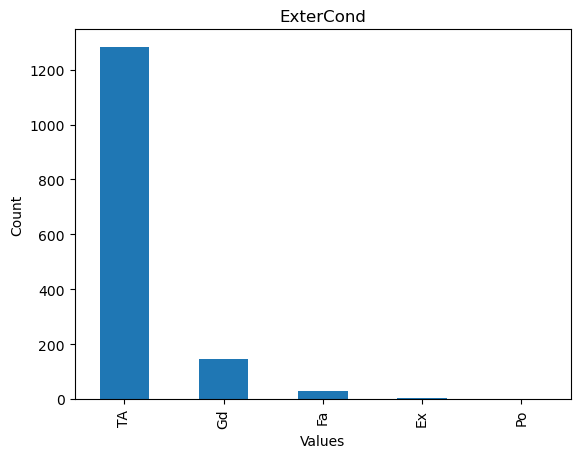

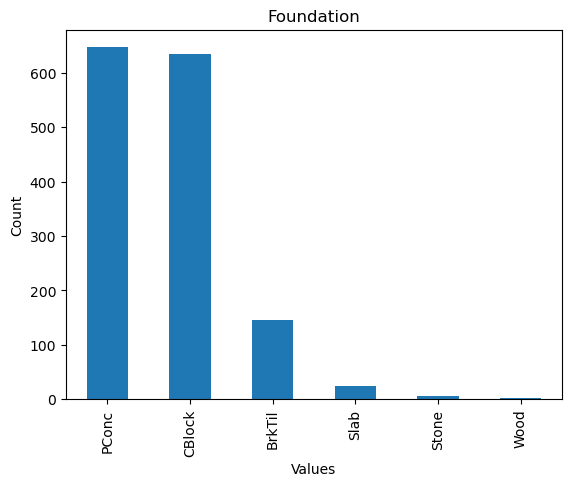

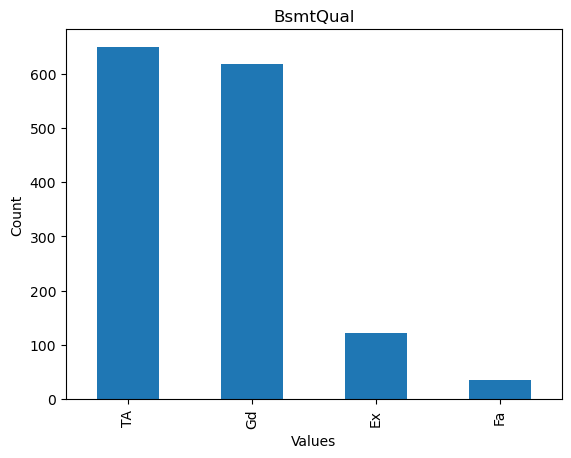

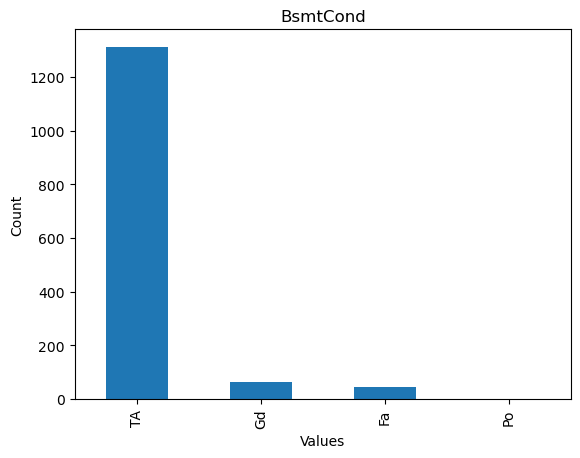

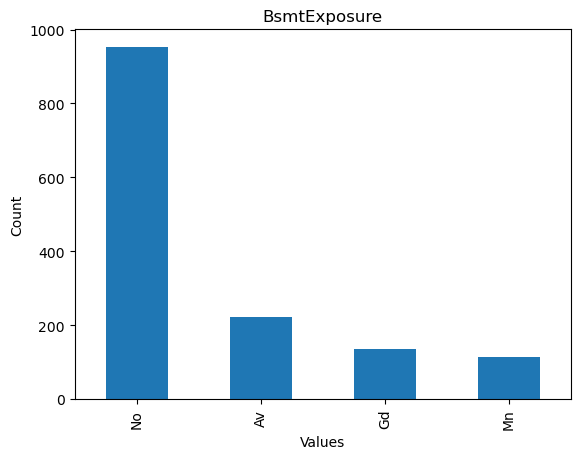

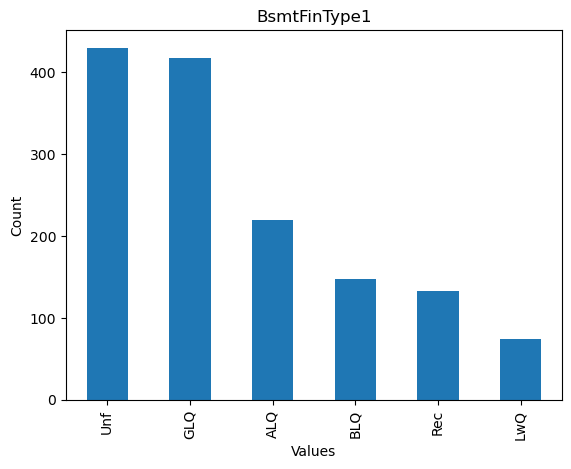

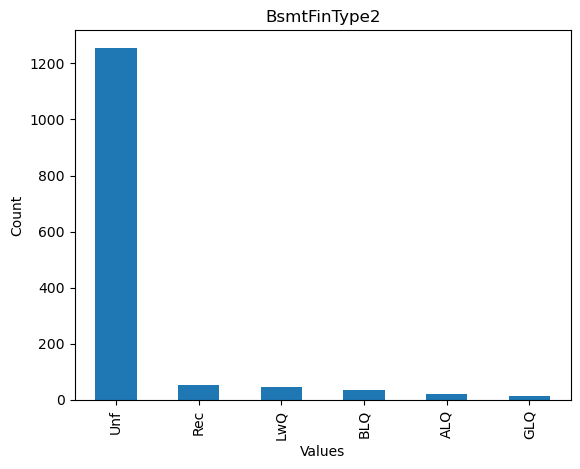

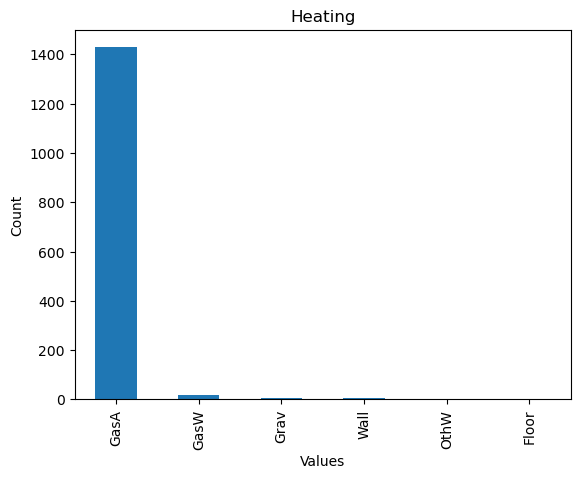

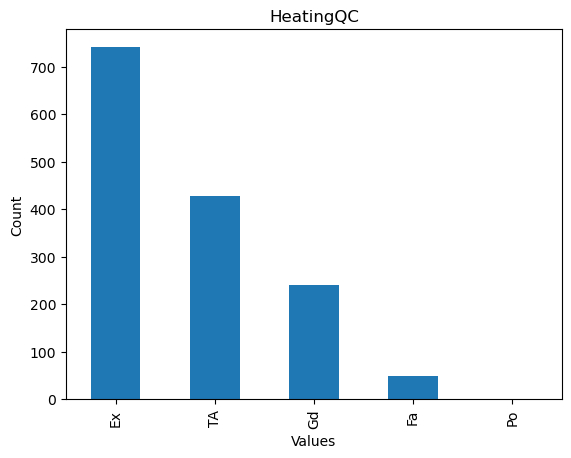

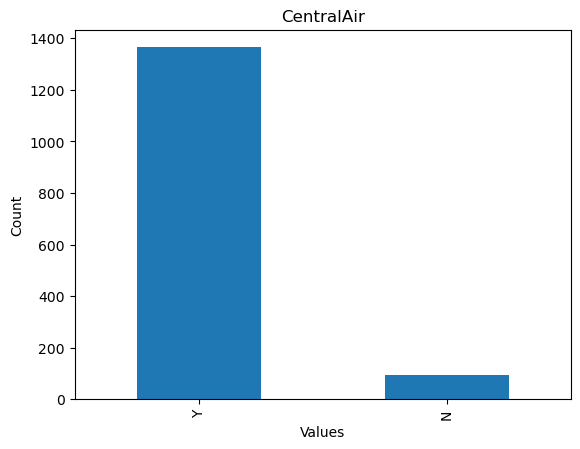

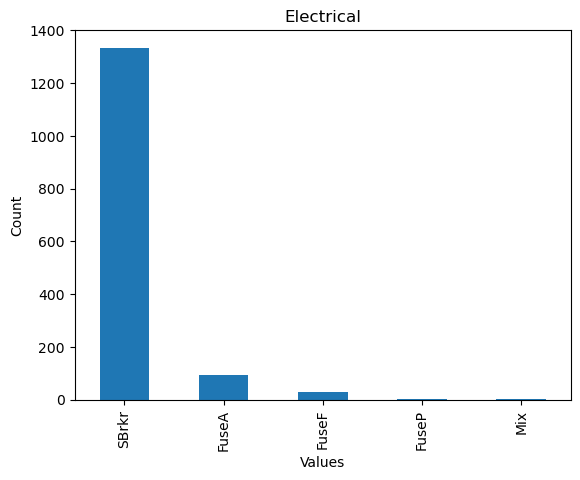

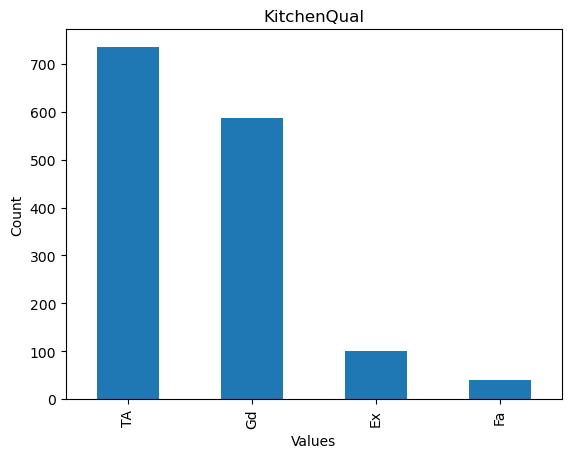

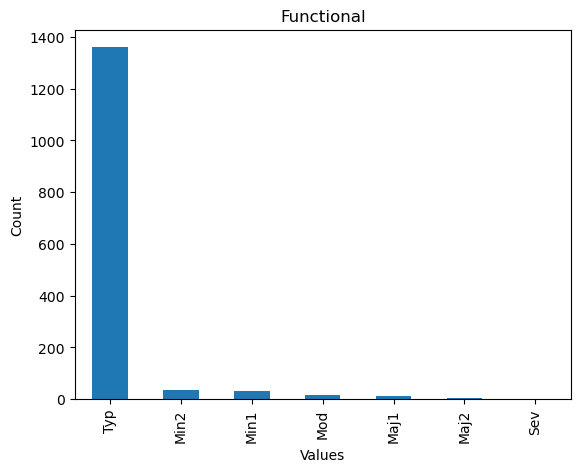

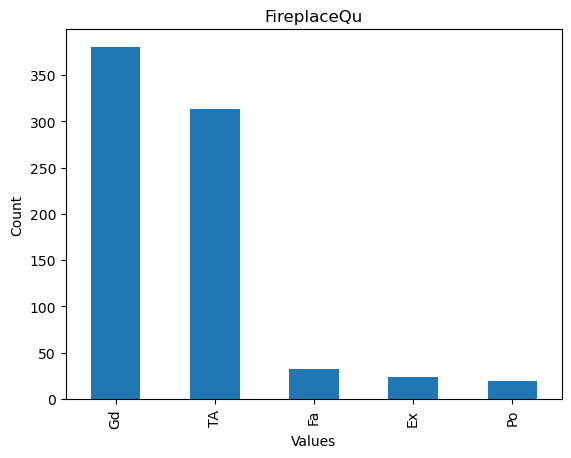

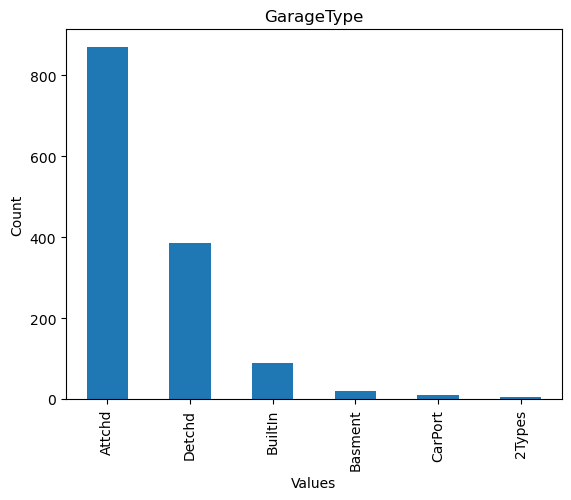

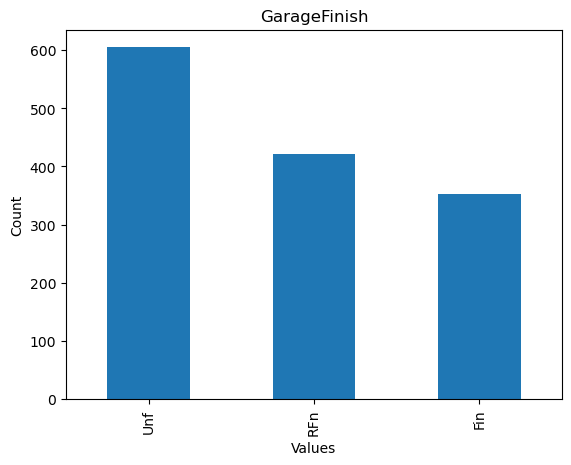

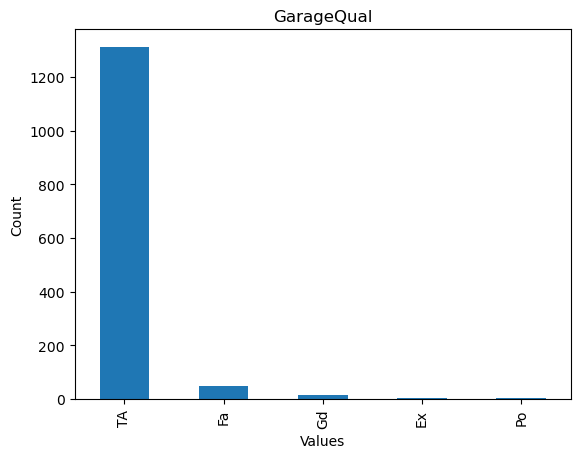

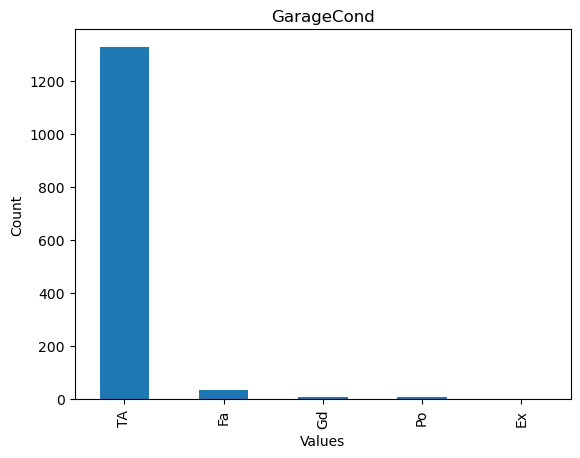

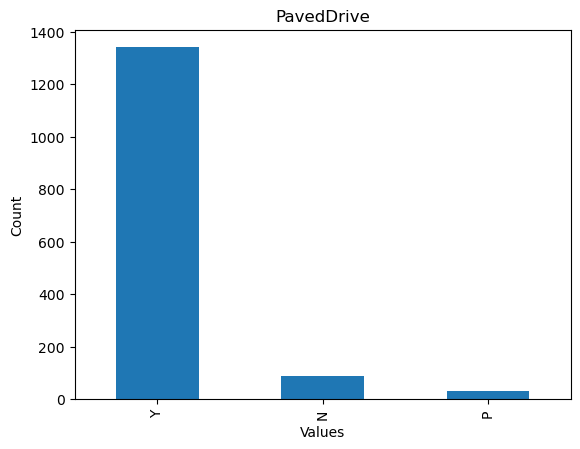

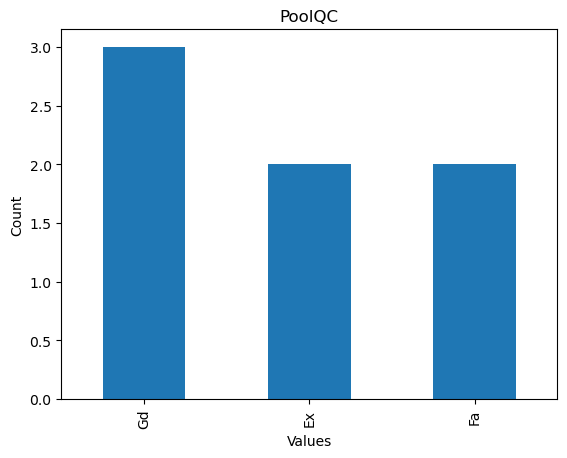

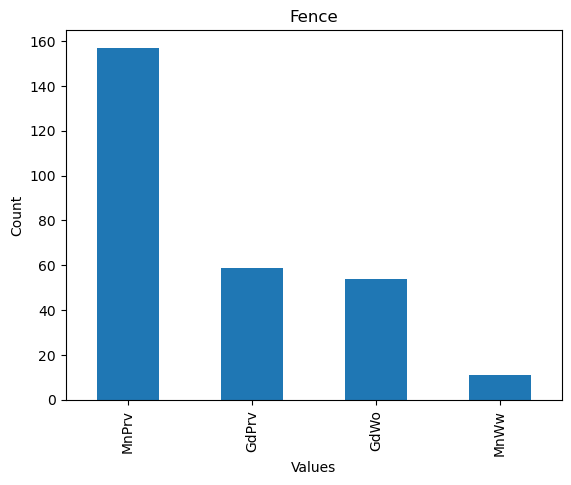

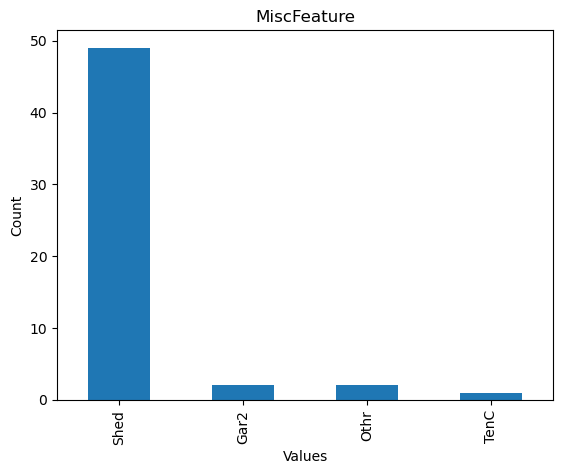

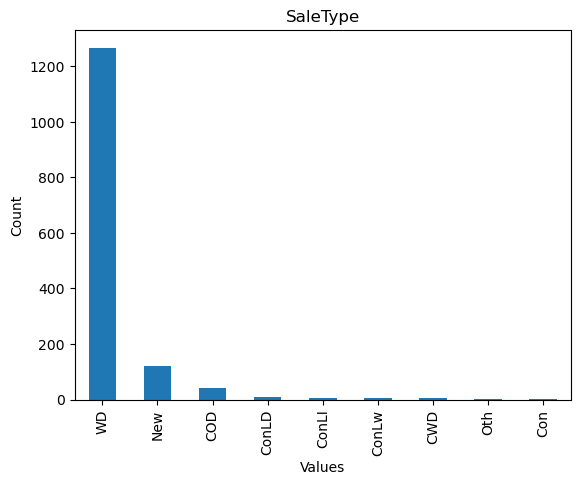

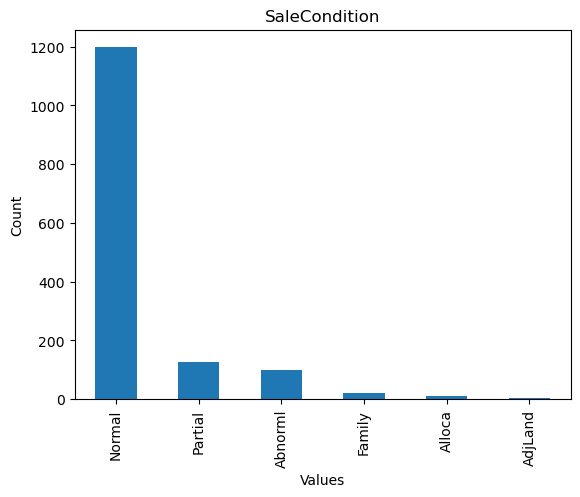

In [8]:
import matplotlib.pyplot as plt
categorical_columns = [col for col in train.columns.values if train[col].dtype == 'object']

for col in categorical_columns:
    column_data = train[col] 

    # calculate the number of each value
    value_counts = column_data.value_counts()

    # show the barplot
    value_counts.plot(kind='bar')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

# Handling NULL

<Axes: >

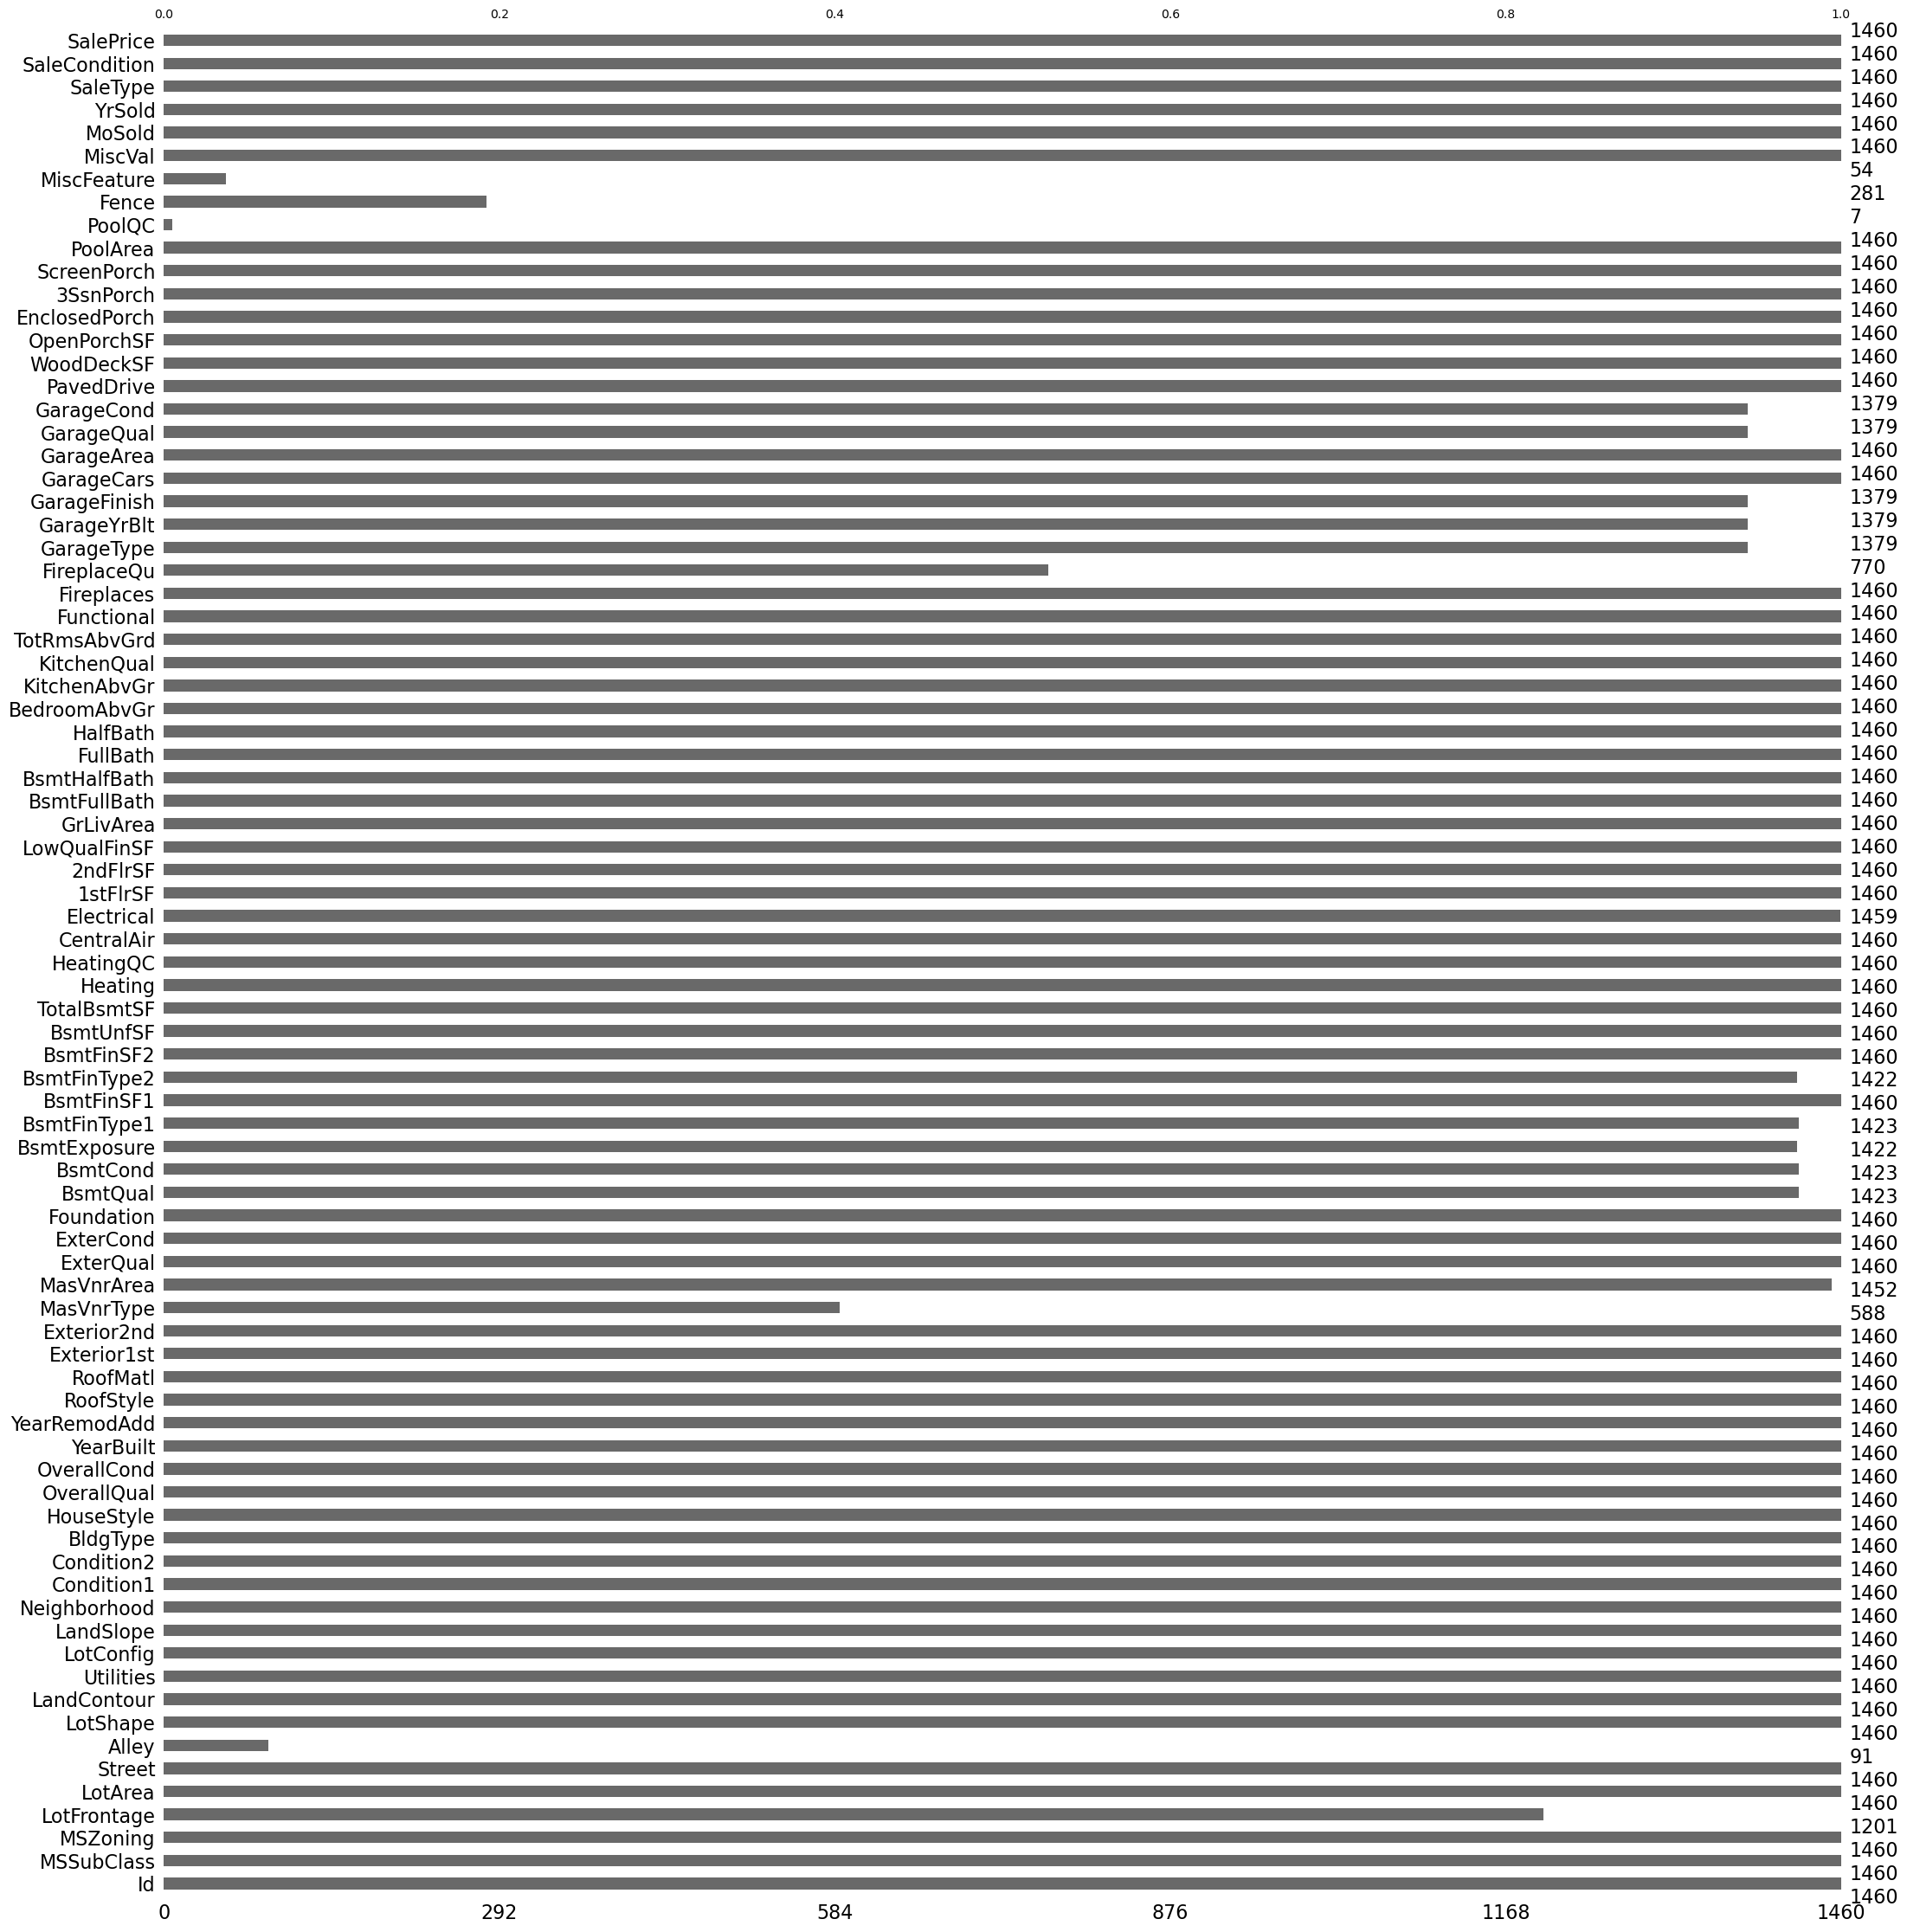

In [9]:
msno.bar(train)

## Delete attributes with missing values greater than 15%

In [10]:
train_missing

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [11]:
i=0
m_list=[]
test_m_list = test_missing.index.tolist()
for col in train_missing["Percentage"]:
    if(col > 15):  
        train = train.drop(train_missing["Percentage"].index[i],axis=1)
        print(train_missing["Percentage"].index[i])
        if train_missing["Percentage"].index[i] in test_missing.index:
            test= test.drop(test_missing["Percentage"].index[i],axis=1)
            test_m_list.remove(test_missing["Percentage"].index[i])
    else:
        m_list.append(train_missing["Percentage"].index[i])
    i+=1

PoolQC
MiscFeature
Alley
Fence
MasVnrType
FireplaceQu
LotFrontage


# Encoding

In [12]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [13]:
categorical_columns = [col for col in train.columns.values if train[col].dtype == 'object']
num_columns = [col for col in train.columns.values if train[col].dtype != 'object']
num_columns.remove("SalePrice")
num_columns.remove("Id")

In [14]:
sales_mean = train["SalePrice"].mean()
sales_mean

180921.19589041095

In [15]:
num = train.shape[0]
num

1460

In [16]:
for col in categorical_columns:
    handle_col = [col, "SalePrice"]
    handle_data = train[handle_col]
    train[col].fillna("NULL", inplace = True)
    test[col].fillna("NULL", inplace = True)
    handle_table = handle_data.fillna("NULL").groupby(col).describe()
    handle_table.fillna(handle_table.iloc[:,2].mean(), inplace = True)
    z = (handle_table.iloc[:,1]-sales_mean) / handle_table.iloc[:,2] #(x-mean)/sd
    encoding_data=z
#     encoding_data = sigmoid(z) * 100
    #handle_dic = encoding_data.to_dict()
    #print(z)
    print(encoding_data)
    train[col].replace(encoding_data, inplace = True)
    test[col].replace(encoding_data, inplace = True)

MSZoning
C (all)   -3.148557
FV         0.631909
RH        -1.382165
RL         0.124852
RM        -1.125360
dtype: float64
Street
Grvl   -0.775150
Pave    0.002635
dtype: float64
LotShape
IR1    0.293279
IR2    0.591076
IR3    0.425432
Reg   -0.232031
dtype: float64
LandContour
Bnk   -0.766130
HLS    0.497226
Low    0.270922
Lvl   -0.009399
dtype: float64
Utilities
AllPub    0.000375
NoSeWa   -0.546443
dtype: float64
LotConfig
Corner     0.008314
CulDSac    0.461067
FR2       -0.047566
FR3        0.351545
Inside    -0.052117
dtype: float64
LandSlope
Gtl   -0.012259
Mod    0.171181
Sev    0.270472
dtype: float64
Neighborhood
Blmngtn    0.458973
Blueste   -2.274328
BrDale    -5.333322
BrkSide   -1.390061
ClearCr    0.629967
CollgCr    0.331583
Crawfor    0.431321
Edwards   -1.219699
Gilbert    0.331603
IDOTRR    -2.420772
MeadowV   -3.505366
Mitchel   -0.675619
NAmes     -1.060431
NPkVill   -4.076514
NWAmes     0.218681
NoRidge    1.271483
NridgHt    1.404148
OldTown   -1.000861
SWISU  

In [17]:
test = test.apply(pd.to_numeric, errors='coerce')

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0.124852,8450,0.002635,-0.232031,-0.009399,0.000375,-0.052117,-0.012259,...,0,0,0,0,0,2,2008,-0.105713,-0.082035,208500
1,2,20,0.124852,9600,0.002635,-0.232031,-0.009399,0.000375,-0.047566,-0.012259,...,0,0,0,0,0,5,2007,-0.105713,-0.082035,181500
2,3,60,0.124852,11250,0.002635,0.293279,-0.009399,0.000375,-0.052117,-0.012259,...,0,0,0,0,0,9,2008,-0.105713,-0.082035,223500
3,4,70,0.124852,9550,0.002635,0.293279,-0.009399,0.000375,0.008314,-0.012259,...,272,0,0,0,0,2,2006,-0.105713,-0.415412,140000
4,5,60,0.124852,14260,0.002635,0.293279,-0.009399,0.000375,-0.047566,-0.012259,...,0,0,0,0,0,12,2008,-0.105713,-0.082035,250000


In [19]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,-1.382165,11622,0.002635,-0.232031,-0.009399,0.000375,-0.052117,-0.012259,...,0,0,0,120,0,0,6,2010,-0.105713,-0.082035
1,1462,20,0.124852,14267,0.002635,0.293279,-0.009399,0.000375,0.008314,-0.012259,...,36,0,0,0,0,12500,6,2010,-0.105713,-0.082035
2,1463,60,0.124852,13830,0.002635,0.293279,-0.009399,0.000375,-0.052117,-0.012259,...,34,0,0,0,0,0,3,2010,-0.105713,-0.082035
3,1464,60,0.124852,9978,0.002635,0.293279,-0.009399,0.000375,-0.052117,-0.012259,...,36,0,0,0,0,0,6,2010,-0.105713,-0.082035
4,1465,120,0.124852,5005,0.002635,0.293279,0.497226,0.000375,-0.052117,-0.012259,...,82,0,0,144,0,0,1,2010,-0.105713,-0.082035


In [20]:
train_y=train["SalePrice"]
train = train.drop(columns=["SalePrice"],axis=1)

## Fit in missing values

In [21]:
#all the parameters
#KNN model
num_of_neighbor=1000
weight_type="uniform"

In [22]:
def missing_value_all(NA_list, df):
    
    #copy df which used in those two model
    train_knn = df.copy(deep=True)
    knn_imputer = KNNImputer(n_neighbors=num_of_neighbor, weights=weight_type)
    train_mice = df.copy(deep=True)
#     mice_imputer = IterativeImputer()
    
    for col_name in NA_list:
        #KNN model
        train_knn[col_name] = knn_imputer.fit_transform(train_knn[[col_name]])
        #Mice
#         train_mice[col_name] = mice_imputer.fit_transform(train_mice[[col_name]])
        
    modle_list = []
    modle_list.append(train_knn)
#     modle_list.append(train_mice)
    return modle_list

In [23]:
def calculate_mean(df,indices:list,frame:list):
    s=0
    for ind in indices:
        s=0
        for table in frame:
            s+=table.iloc[ind[0],ind[1]]
        df.iloc[ind[0],ind[1]]=s/len(frame)

In [24]:
# Create a boolean mask indicating the locations of NaN values
train = pd.DataFrame(train)
mask = pd.isnull(train.values)

# Extract the indices of the NaN values
indices = np.argwhere(mask).tolist()
indices

[[39, 55],
 [48, 55],
 [78, 55],
 [88, 55],
 [89, 55],
 [99, 55],
 [108, 55],
 [125, 55],
 [127, 55],
 [140, 55],
 [148, 55],
 [155, 55],
 [163, 55],
 [165, 55],
 [198, 55],
 [210, 55],
 [234, 23],
 [241, 55],
 [250, 55],
 [287, 55],
 [291, 55],
 [307, 55],
 [375, 55],
 [386, 55],
 [393, 55],
 [431, 55],
 [434, 55],
 [441, 55],
 [464, 55],
 [495, 55],
 [520, 55],
 [528, 55],
 [529, 23],
 [533, 55],
 [535, 55],
 [562, 55],
 [582, 55],
 [613, 55],
 [614, 55],
 [620, 55],
 [635, 55],
 [636, 55],
 [638, 55],
 [649, 55],
 [650, 23],
 [705, 55],
 [710, 55],
 [738, 55],
 [750, 55],
 [784, 55],
 [826, 55],
 [843, 55],
 [921, 55],
 [936, 23],
 [942, 55],
 [954, 55],
 [960, 55],
 [968, 55],
 [970, 55],
 [973, 23],
 [976, 55],
 [977, 23],
 [1009, 55],
 [1011, 55],
 [1030, 55],
 [1038, 55],
 [1096, 55],
 [1123, 55],
 [1131, 55],
 [1137, 55],
 [1143, 55],
 [1173, 55],
 [1179, 55],
 [1218, 55],
 [1219, 55],
 [1234, 55],
 [1243, 23],
 [1257, 55],
 [1278, 23],
 [1283, 55],
 [1323, 55],
 [1325, 55],
 [

In [25]:
# Create a boolean mask indicating the locations of NaN values
test = pd.DataFrame(test)
test_mask = pd.isnull(test.values)

# Extract the indices of the NaN values
test_indices = np.argwhere(test_mask).tolist()
test_indices

[[53, 55],
 [71, 55],
 [79, 55],
 [92, 55],
 [95, 50],
 [96, 55],
 [98, 55],
 [100, 55],
 [130, 55],
 [133, 55],
 [134, 55],
 [154, 55],
 [155, 55],
 [231, 23],
 [246, 23],
 [257, 55],
 [261, 55],
 [327, 55],
 [348, 55],
 [350, 55],
 [351, 55],
 [359, 55],
 [362, 55],
 [371, 55],
 [374, 55],
 [376, 55],
 [379, 55],
 [387, 55],
 [422, 23],
 [433, 55],
 [455, 2],
 [455, 7],
 [485, 7],
 [532, 23],
 [544, 23],
 [550, 55],
 [581, 23],
 [621, 55],
 [630, 55],
 [633, 55],
 [636, 55],
 [639, 55],
 [644, 55],
 [660, 31],
 [660, 33],
 [660, 34],
 [660, 35],
 [660, 44],
 [660, 45],
 [666, 55],
 [675, 55],
 [691, 21],
 [691, 22],
 [691, 55],
 [693, 55],
 [728, 44],
 [728, 45],
 [729, 55],
 [730, 55],
 [731, 55],
 [732, 55],
 [733, 55],
 [752, 55],
 [756, 2],
 [756, 52],
 [778, 55],
 [786, 55],
 [790, 2],
 [851, 23],
 [865, 23],
 [880, 23],
 [889, 23],
 [893, 55],
 [894, 55],
 [908, 23],
 [938, 55],
 [939, 55],
 [962, 55],
 [966, 55],
 [1013, 52],
 [1029, 71],
 [1092, 55],
 [1093, 55],
 [1097, 55],

In [26]:
m_table_list=missing_value_all(m_list, train)
m_table_list

[        Id  MSSubClass  MSZoning  LotArea    Street  LotShape  LandContour  \
 0        1          60  0.124852     8450  0.002635 -0.232031    -0.009399   
 1        2          20  0.124852     9600  0.002635 -0.232031    -0.009399   
 2        3          60  0.124852    11250  0.002635  0.293279    -0.009399   
 3        4          70  0.124852     9550  0.002635  0.293279    -0.009399   
 4        5          60  0.124852    14260  0.002635  0.293279    -0.009399   
 ...    ...         ...       ...      ...       ...       ...          ...   
 1455  1456          60  0.124852     7917  0.002635 -0.232031    -0.009399   
 1456  1457          20  0.124852    13175  0.002635 -0.232031    -0.009399   
 1457  1458          70  0.124852     9042  0.002635 -0.232031    -0.009399   
 1458  1459          20  0.124852     9717  0.002635 -0.232031    -0.009399   
 1459  1460          20  0.124852     9937  0.002635 -0.232031    -0.009399   
 
       Utilities  LotConfig  LandSlope  ...  OpenP

In [27]:
test_m_list

['GarageCond',
 'GarageYrBlt',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrArea',
 'MSZoning',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'Utilities',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'KitchenQual',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'Exterior2nd',
 'Exterior1st',
 'SaleType']

In [28]:
test_m_table_list=missing_value_all(test_m_list, test)
test_m_table_list

[        Id  MSSubClass  MSZoning  LotArea    Street  LotShape  LandContour  \
 0     1461          20 -1.382165    11622  0.002635 -0.232031    -0.009399   
 1     1462          20  0.124852    14267  0.002635  0.293279    -0.009399   
 2     1463          60  0.124852    13830  0.002635  0.293279    -0.009399   
 3     1464          60  0.124852     9978  0.002635  0.293279    -0.009399   
 4     1465         120  0.124852     5005  0.002635  0.293279     0.497226   
 ...    ...         ...       ...      ...       ...       ...          ...   
 1454  2915         160 -1.125360     1936  0.002635 -0.232031    -0.009399   
 1455  2916         160 -1.125360     1894  0.002635 -0.232031    -0.009399   
 1456  2917          20  0.124852    20000  0.002635 -0.232031    -0.009399   
 1457  2918          85  0.124852    10441  0.002635 -0.232031    -0.009399   
 1458  2919          60  0.124852     9627  0.002635 -0.232031    -0.009399   
 
       Utilities  LotConfig  LandSlope  ...  OpenP

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   float64
 5   LotShape       1459 non-null   float64
 6   LandContour    1459 non-null   float64
 7   Utilities      1457 non-null   float64
 8   LotConfig      1459 non-null   float64
 9   LandSlope      1459 non-null   float64
 10  Neighborhood   1459 non-null   float64
 11  Condition1     1459 non-null   float64
 12  Condition2     1459 non-null   float64
 13  BldgType       1459 non-null   float64
 14  HouseStyle     1459 non-null   float64
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [30]:
calculate_mean(train,indices,m_table_list)

In [31]:
calculate_mean(test,test_indices,test_m_table_list)

In [32]:
missing_values_table(train)

,Missing Values,Percentage


# Feature selection

## Deleting the columns which the pecentage of one attribute is too large

In [33]:
for col in train.columns:
    value_counts = train[col].value_counts()

    percentage = value_counts / len(train) * 100

    max_percentage = percentage.max()

    if max_percentage > 85:
        train = train.drop(col, axis=1)
        test = test.drop(col,axis=1)
        print(col)

Street
LandContour
Utilities
LandSlope
Condition1
Condition2
RoofMatl
ExterCond
BsmtCond
BsmtFinType2
BsmtFinSF2
Heating
CentralAir
Electrical
LowQualFinSF
BsmtHalfBath
KitchenAbvGr
Functional
GarageQual
GarageCond
PavedDrive
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SaleType


## Combine some columns with higher correlation

<Axes: >

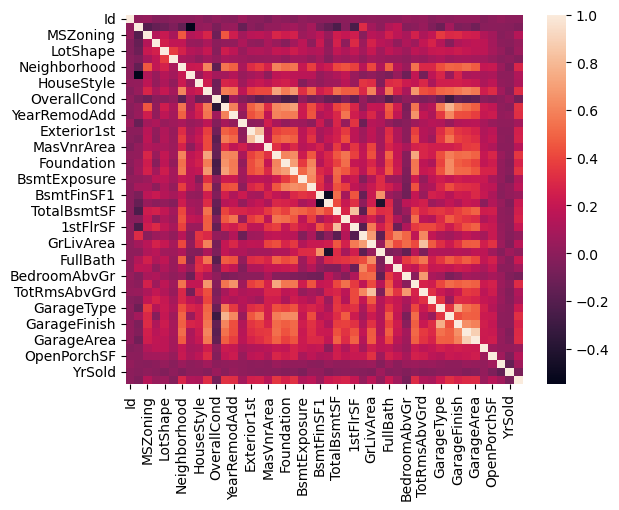

In [34]:
sns.heatmap(train.corr())

In [35]:
def correlation(dataset,threshold):
    col_corr=dict() # set will contains unique values.
    drop=set()
    corr_matrix=dataset.corr() #finding the correlation between columns.
    flag=True
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                flag=False
                if(corr_matrix.columns[j] not in col_corr.keys()):
                    col_corr[corr_matrix.columns[i]]=corr_matrix.columns[j]
                    drop.add(corr_matrix.columns[j])
                    drop.add(corr_matrix.columns[i])
    return col_corr, drop, flag #returning set of column names

In [36]:
i=1
def combine(correlated_col:dict,drop:set):
    pca=PCA(n_components=1)
    global i
    for key in correlated_col.keys():
        print(key)
        X=train[[key,correlated_col[key]]]
        print(X)
        pca.fit(X)
        train["cf"+str(i)]=pca.transform(X)
        i+=1
    for item in drop:
        train.drop(item,axis=1,inplace=True)

In [37]:
comb = pd.DataFrame({
        'correlated_col': dict,
        'drop': []
    })

In [38]:
def iterative(df,threshold,combination):
    stop=False
    while(stop==False):
        sns.heatmap(df.corr())
        correlated_col,drop,stop=correlation(df,threshold)
        combination = pd.concat([combination, pd.DataFrame([{'correlated_col': correlated_col, 'drop': drop}])], ignore_index=True)
        combine(correlated_col,drop)
    return combination

,correlated_col,drop
0,{},{}


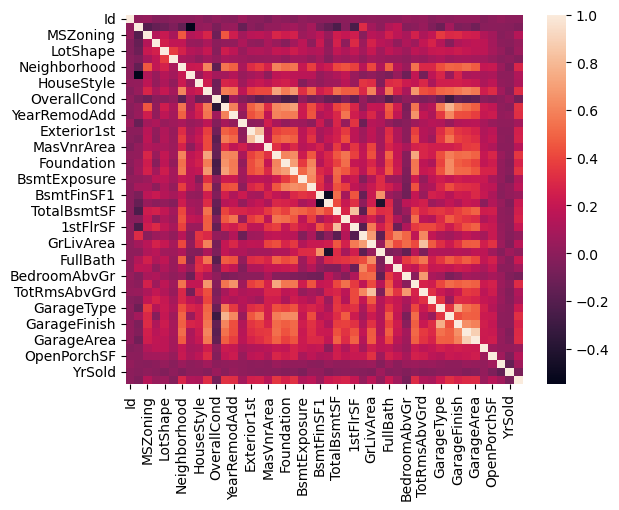

In [39]:
comb = iterative(train,1,combination=comb)
#show the dataframe of the combined corelated_col and drop
comb

<Axes: >

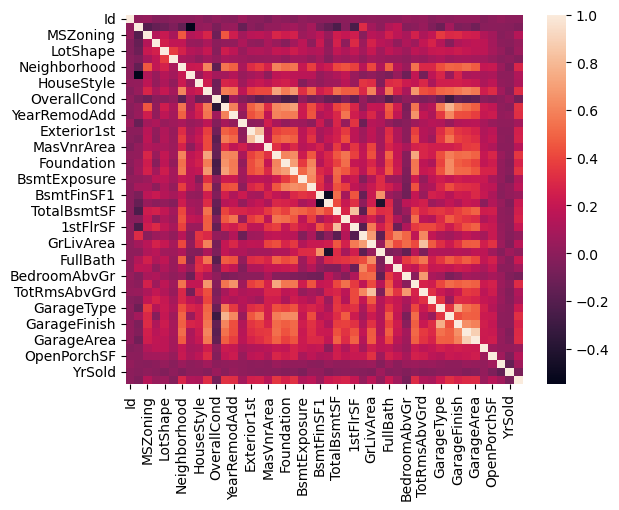

In [40]:
train.head()
sns.heatmap(train.corr())

In [41]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition
0,1461,20,-1.382165,11622,-0.232031,-0.052117,-1.060431,0.058593,-0.064054,5,...,0.284801,1961.0,-0.833677,1.0,730.0,140,0,6,2010,-0.082035
1,1462,20,0.124852,14267,0.293279,0.008314,-1.060431,0.058593,-0.064054,6,...,0.284801,1958.0,-0.833677,1.0,312.0,393,36,6,2010,-0.082035
2,1463,60,0.124852,13830,0.293279,-0.052117,0.331603,0.058593,0.333534,5,...,0.284801,1997.0,0.609851,2.0,482.0,212,34,3,2010,-0.082035
3,1464,60,0.124852,9978,0.293279,-0.052117,0.331603,0.058593,0.333534,6,...,0.284801,1998.0,0.609851,2.0,470.0,360,36,6,2010,-0.082035
4,1465,120,0.124852,5005,0.293279,-0.052117,1.147014,0.017124,-0.064054,8,...,0.284801,1992.0,0.332844,2.0,506.0,0,82,1,2010,-0.082035


## combine as the same as data

In [42]:
i=1
def test_combine(correlated_col:dict,drop:set):
    pca=PCA(n_components=1)
    global i
    for key in correlated_col.keys():
        print(key)
        X=test[[key,correlated_col[key]]]
        print(X)
        pca.fit(X)
        test["cf"+str(i)]=pca.transform(X)
        i+=1
    for item in drop:
        test.drop(item,axis=1,inplace=True)

In [43]:
for l in range(len(comb)):
    test_combine(comb['correlated_col'][l], comb['drop'][l])

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   float64
 5   LotConfig      1459 non-null   float64
 6   Neighborhood   1459 non-null   float64
 7   BldgType       1459 non-null   float64
 8   HouseStyle     1459 non-null   float64
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1459 non-null   int64  
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  RoofStyle      1459 non-null   float64
 14  Exterior1st    1459 non-null   float64
 15  Exterior2nd    1459 non-null   float64
 16  MasVnrArea     1459 non-null   float64
 17  ExterQual      1459 non-null   float64
 18  Foundati

# Data transformation

In [45]:
train.drop(["Id"],axis=1,inplace=True)
train_col = train.columns.tolist()
for col in categorical_columns:
    if col in train_col:
        train_col.remove(col)

In [46]:
combined_df = pd.concat([train, test], axis=0)
combined_df[train_col] = combined_df[train_col].apply(lambda x: (x - x.mean()) / (x.std()))
train = combined_df[:len(train)]
test = combined_df[len(train):]

In [47]:
train = train.drop("Id", axis = 1)

# Split data

In [48]:
X_train, X_eval, y_train, y_eval = train_test_split(train, train_y,test_size=0.15,random_state=1999)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (1241, 45)
Shape of X_eval:  (219, 45)
Shape of y_train:  (1241,)
Shape of y_eval (219,)


In [49]:
X_train

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition
551,-0.873466,-1.125360,-0.528479,-0.232031,-0.052117,-1.000861,0.058593,-0.064054,-0.772420,0.391170,...,0.284801,-0.849038,0.609851,-1.006733,-0.858453,-0.740634,-0.702722,-0.078492,0.157619,-0.082035
1036,-0.873466,0.124852,0.346125,0.293279,-0.052117,0.945727,0.058593,-0.064054,2.064566,-0.507197,...,0.284801,1.201796,0.609851,1.619684,2.039050,1.061359,-0.702722,1.026577,0.918095,-0.082035
418,-0.167877,0.124852,-0.254611,-0.232031,-0.052117,-1.219699,0.058593,-0.696498,-0.772420,0.391170,...,-1.131391,-1.532650,-0.833677,-1.006733,-1.081337,-0.740634,-0.702722,-0.815205,-0.602858,-2.938390
92,-0.638270,0.124852,0.404702,0.293279,-0.052117,0.431321,0.058593,-0.064054,-0.772420,1.289537,...,-1.131391,-2.296686,-0.833677,0.306476,-0.189798,-0.740634,-0.702722,0.658221,0.918095,-0.082035
233,-0.873466,0.124852,0.061099,-0.232031,0.008314,0.331583,0.058593,-0.064054,-0.772420,0.391170,...,0.284801,-0.085002,-0.833677,-1.006733,-0.765584,2.144136,-0.702722,-1.551918,1.678572,-0.082035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,-0.873466,0.124852,-0.091050,-0.232031,-0.052117,-1.219699,0.058593,-0.064054,-1.481667,-0.507197,...,-1.131391,0.839884,-0.833677,0.306476,-0.338388,-0.740634,-0.702722,-0.446848,-0.602858,-0.415412
18,-0.873466,0.124852,0.447177,-0.232031,-0.052117,0.101247,0.058593,-0.064054,-0.772420,-0.507197,...,-1.131391,1.040946,-0.833677,0.306476,0.478856,-0.740634,0.806701,-0.078492,0.157619,-0.082035
343,1.478499,0.124852,-0.167252,0.293279,-0.052117,1.404148,0.017124,-0.064054,2.064566,-0.507197,...,0.284801,1.081159,0.332844,0.306476,0.423135,3.171588,0.362753,0.289865,0.157619,-0.082035
1132,0.302516,-1.125360,-0.033994,-0.232031,-0.052117,-1.000861,0.058593,0.333534,-0.063174,-1.405564,...,-1.131391,-1.934774,-0.833677,-1.006733,-1.243857,-0.740634,0.007594,-0.446848,-0.602858,-0.082035


# Model

In [50]:
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor

ExtraTrees_model = ExtraTreesRegressor()
ExtraTrees_model.fit(X_train, y_train)

RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)

params = {
    'objective': 'reg:squarederror',  
    'max_depth': 3,                   
    'eta': 0.1,                       
    'subsample': 0.8,                 
    'colsample_bytree': 0.8,         
    'eval_metric': 'rmse'        
}

XGBRegressor_model = XGBRegressor(**params, n_estimators=1000)
XGBRegressor_model.fit(X_train, y_train)

Bagging_model = BaggingRegressor()
Bagging_model.fit(X_train, y_train)

LGBM_model = LGBMRegressor()
LGBM_model.fit(X_train, y_train)

KNeighbors_model = KNeighborsRegressor()
KNeighbors_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2853
[LightGBM] [Info] Number of data points in the train set: 1241, number of used features: 45
[LightGBM] [Info] Start training from score 179620.345689


KNeighborsRegressor()

In [52]:
cv_ExtraTrees = cross_val_score(estimator = ExtraTrees_model, X = X_train, y = y_train, cv = 5)
y_pred_ExtraTrees_eval = ExtraTrees_model.predict(X_eval)
r2_score_ExtraTrees_eval = r2_score(y_eval, y_pred_ExtraTrees_eval)
rmse_ExtraTrees = (np.sqrt(mean_squared_error(y_eval, y_pred_ExtraTrees_eval)))
print("CV: ", cv_ExtraTrees.mean())
print('R2_score (eval): ', r2_score_ExtraTrees_eval)
print("RMSE: ", rmse_ExtraTrees)


cv_RandomForest = cross_val_score(estimator = RandomForest_model, X = X_train, y = y_train, cv = 5)
y_pred_RandomForest_eval = RandomForest_model.predict(X_eval)
r2_score_RandomForest_eval = r2_score(y_eval, y_pred_RandomForest_eval)
rmse_RandomForest = (np.sqrt(mean_squared_error(y_eval, y_pred_RandomForest_eval)))
print("CV: ", cv_RandomForest.mean())
print('R2_score (eval): ', r2_score_RandomForest_eval)
print("RMSE: ", rmse_RandomForest)


cv_XGBoost = cross_val_score(estimator = XGBRegressor_model, X = X_train, y = y_train, cv = 5)
y_pred_XGBoost_eval = XGBRegressor_model.predict(X_eval)
r2_score_XGBoost_eval = r2_score(y_eval, y_pred_XGBoost_eval)
rmse_XGBoost = (np.sqrt(mean_squared_error(y_eval, y_pred_XGBoost_eval)))
print("CV: ", cv_XGBoost.mean())
print('R2_score (eval): ', r2_score_XGBoost_eval)
print("RMSE: ", rmse_XGBoost)


cv_Bagging = cross_val_score(estimator = Bagging_model, X = X_train, y = y_train, cv = 5)
y_pred_Bagging_eval = Bagging_model.predict(X_eval)
r2_score_Bagging_eval = r2_score(y_eval, y_pred_Bagging_eval)
rmse_Bagging = (np.sqrt(mean_squared_error(y_eval, y_pred_Bagging_eval)))
print("CV: ", cv_Bagging.mean())
print('R2_score (eval): ', r2_score_Bagging_eval)
print("RMSE: ", rmse_Bagging)

cv_LGBM = cross_val_score(estimator = LGBM_model, X = X_train, y = y_train, cv = 5)
y_pred_LGBM_eval = LGBM_model.predict(X_eval)
r2_score_LGBM_eval = r2_score(y_eval, y_pred_LGBM_eval)
rmse_LGBM = (np.sqrt(mean_squared_error(y_eval, y_pred_LGBM_eval)))
print("CV: ", cv_LGBM.mean())
print('R2_score (eval): ', r2_score_LGBM_eval)
print("RMSE: ", rmse_LGBM)


cv_KNeighbors = cross_val_score(estimator = KNeighbors_model, X = X_train, y = y_train, cv = 5)
y_pred_KNeighbors_eval =KNeighbors_model.predict(X_eval)
r2_score_KNeighbors_eval = r2_score(y_eval, y_pred_KNeighbors_eval)
rmse_KNeighbors = (np.sqrt(mean_squared_error(y_eval, y_pred_KNeighbors_eval)))
print("CV: ", cv_KNeighbors.mean())
print('R2_score (eval): ', r2_score_KNeighbors_eval)
print("RMSE: ", rmse_KNeighbors)

CV:  0.856685361198379
R2_score (eval):  0.8899350417301218
RMSE:  29650.05796722455
CV:  0.8571508883363407
R2_score (eval):  0.884761539834529
RMSE:  30338.893217978082
CV:  0.8974243449507305
R2_score (eval):  0.8818382700316026
RMSE:  30721.288765018915
CV:  0.8451984253508614
R2_score (eval):  0.8727753709686497
RMSE:  31877.672662252728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2724
[LightGBM] [Info] Number of data points in the train set: 992, number of used features: 45
[LightGBM] [Info] Start training from score 179782.958669
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2732
[LightGBM] [Info] Number of data points in the train set: 993, number of used features: 45
[LightGBM] [Info] Start

In [53]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=220).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

averaged_models = AveragingModels(models = (LGBM_model,RandomForest_model, ExtraTrees_model,XGBRegressor_model))
#Remove KNeighbors_model

In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (RandomForest_model, ExtraTrees_model,XGBRegressor_model,Bagging_model),
                                                 meta_model = LGBM_model) ##Remove KNeighbors_model
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1241, number of used features: 4
[LightGBM] [Info] Start training from score 179620.345689


In [56]:
cv_stacking = cross_val_score(estimator = stacking_model, X = X_train.values, y = y_train.values, cv = 5)
y_pred_stacking_eval =stacking_model.predict(X_eval.values)
r2_score_stacking_eval = r2_score(y_eval.values, y_pred_stacking_eval)
rmse_stacking = (np.sqrt(mean_squared_error(y_eval.values, y_pred_stacking_eval)))
print("CV: ", cv_stacking.mean())
print('R2_score (eval): ', r2_score_stacking_eval)
print("RMSE: ", rmse_stacking)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 992, number of used features: 4
[LightGBM] [Info] Start training from score 179782.958669
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 993, number of used features: 4
[LightGBM] [Info] Start training from score 179628.659617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 993, number of used features: 4
[LightGBM] [Info] Start tr

In [57]:
models = [('RandomForest', rmse_RandomForest,  r2_score_RandomForest_eval, cv_RandomForest.mean()),
          ('XGB', rmse_XGBoost,  r2_score_XGBoost_eval, cv_XGBoost.mean()),
          ('KNeighbors', rmse_KNeighbors,  r2_score_KNeighbors_eval, cv_KNeighbors.mean()),
          ('Bagging', rmse_Bagging,  r2_score_Bagging_eval, cv_Bagging.mean()),
          ('LGBM', rmse_LGBM, r2_score_LGBM_eval, cv_LGBM.mean()),
          ('ExtraTrees', rmse_ExtraTrees,  r2_score_ExtraTrees_eval, cv_ExtraTrees.mean()),
          ('Stacking', rmse_stacking,  r2_score_stacking_eval, cv_stacking.mean())
         ]                                          


predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(eval)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(eval),Cross-Validation
0,RandomForest,30338.893218,0.884762,0.857151
1,XGB,30721.288765,0.881838,0.897424
2,KNeighbors,39040.503864,0.809178,0.801562
3,Bagging,31877.672662,0.872775,0.845198
4,LGBM,31114.885505,0.878791,0.879477
5,ExtraTrees,29650.057967,0.889935,0.856685
6,Stacking,34807.066196,0.848318,0.864923


In [58]:
pred = XGBRegressor_model.predict(test.iloc[:,:-1])
pred

array([122410.66, 166630.05, 180639.55, ..., 153219.52, 109861.53,
       202074.7 ], dtype=float32)

In [59]:
output = pd.DataFrame({'Id': test['Id'],
                       'SalePrice':pred})

output.to_csv("E:/year3_sem1/COMP4433/competition/submission_stack.csv",index=False)

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler

In [61]:
from hyperopt import fmin, tpe, hp

def bayesian_optimization_xgb(train, y_train):
    def objective(params):
        # Define the XGBoost model
        model_xgb = xgb.XGBRegressor(
            max_depth=int(params['max_depth']),
            learning_rate=params['learning_rate'],
            n_estimators=int(params['n_estimators']),
            min_child_weight=int(params['min_child_weight']),
            colsample_bytree=params['colsample_bytree'],
            subsample=params['subsample'],
            reg_alpha=params['reg_alpha'],
            reg_lambda=params['reg_lambda'],
            num_parallel_tree=int(params['num_parallel_tree']),
            random_state=0
        )
        score = rmse_cv(model_xgb, train, y_train)
        return score.mean()

    # Define the search space for hyperparameters
    space = {
        'max_depth': hp.quniform('max_depth', 2, 10, 1),
        'learning_rate': hp.loguniform('learning_rate', -4, -1),
        'n_estimators': hp.quniform('n_estimators', 1000, 8000, 100),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 1.0),
        'subsample': hp.uniform('subsample', 0.2, 1.0),
        'reg_alpha': hp.uniform('reg_alpha', 0.0, 10.0),
        'reg_lambda': hp.uniform('reg_lambda', 0.0, 10.0),
        'num_parallel_tree': hp.quniform('num_parallel_tree', 1, 5, 1),
    }

    # Use the Tree-structured Parzen Estimator (TPE) for Bayesian Optimization
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)

    print("Best Hyperparameters:")
    print(best)

    best_params = {
        'max_depth': int(best['max_depth']),
        'learning_rate': best['learning_rate'],
        'n_estimators': int(best['n_estimators']),
        'min_child_weight': int(best['min_child_weight']),
        'colsample_bytree': best['colsample_bytree'],
        'subsample': best['subsample'],
        'reg_alpha': best['reg_alpha'],
        'reg_lambda': best['reg_lambda'],
        'num_parallel_tree': int(best['num_parallel_tree']),
        'random_state': 0,
    }
    return best_params

In [62]:
lasso_params = dict(alpha=0.0005,
                    max_iter=500,
                    random_state=0)
lasso_model = make_pipeline(RobustScaler(), Lasso(**lasso_params))
#score1 = rmse_cv(lasso_model, train, y_train)
#print("\nLasso score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))

In [63]:
enet_params = {'alpha': 0.00053, 'l1_ratio': 0.87,'random_state':0}
ENet_model = make_pipeline(RobustScaler(), ElasticNet(**enet_params))
#score_enet = rmse_cv(ENet_model, train, y_train)
#print("ElasticNet score: {:.4f} ({:.4f})\n".format(score_enet.mean(), score_enet.std()))

In [64]:
krr_params = {'alpha': 0.9955795829727777, 'coef0': 3.050866892911543, 'degree': 2, 'kernel': 'polynomial'}
KRR_model = KernelRidge(**krr_params)
#score_krr = rmse_cv(KRR_model, train, y_train)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score_krr.mean(), score_krr.std()))

In [65]:
gb_params = dict(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

gb_model = GradientBoostingRegressor(**gb_params)
#score_gb = rmse_cv(gb_model, train, y_train)
#print("Gradient Boosting score: {:.4f} ({:.4f})".format(score_gb.mean(), score_gb.std()))

In [66]:
best_xgb_params = {'colsample_bytree': 0.20907520579337463, 
                   'learning_rate': 0.022983300384498445, 
                   'max_depth': 8, 
                   'min_child_weight': 3, 
                   'n_estimators': 4700, 
                   'num_parallel_tree': 5, 
                   'reg_alpha': 1.0750193287004437, 
                   'reg_lambda': 3.2276490182605846, 
                   'subsample': 0.42390238607992753, 
                   'random_state':0,
#                    'tree_method':'gpu_hist',
#                    'n_gpus': 1
                  }

xgb_model = xgb.XGBRegressor(**best_xgb_params)
#score_xgb = rmse_cv(xgb_model, train, y_train)
#print("XGBoost score: {:.4f} ({:.4f})".format(score_xgb.mean(), score_xgb.std()))


In [67]:
best_lgb_params = {'bagging_seed': 87, 
                   'colsample_bytree': 0.6845434595099318, 
                   'feature_fraction_seed': 65, 
                   'learning_rate': 0.007922070199067432, 
                   'max_bin': 40, 
                   'min_child_samples': 2, 
                   'min_child_weight': 0.49619792048644934, 
                   'n_estimators': 990, 
                   'num_leaves': 29, 
                   'subsample': 0.27006864272427383, 
                   'subsample_freq': 1, 
                   'seed':0,
#                    "device": "gpu", 
#                    "gpu_platform_id": 0,
#                    "gpu_device_id": 0,
                  }
lgb_model = lgb.LGBMRegressor(objective='regression', **best_lgb_params)
#score_lgb = rmse_cv(lgb_model, train, y_train)
#print("LGBM score: {:.4f} ({:.4f})".format(score_lgb.mean(), score_lgb.std()))

In [68]:
# %%time

# score = rmse_cv(xgb_model, train, y_train)
# print("XGBoost cross validation score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# 0.1158 (0.0088)

In [69]:
from sklearn.ensemble import StackingRegressor

estimators = [('lasso', lasso_model),('enet', ENet_model),('gboost', gb_model),('xgb', xgb_model),('lgb', lgb_model)]
final_estimator = lasso_model
stacked_models = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

In [70]:
def rmse_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

# Score that will be used when training on whole training dataset
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [71]:
%%time

stacked_models.fit(X_train.values, y_train)
avg_train_pred = stacked_models.predict(X_train.values)
print('Stacked model rmse: ',rmse(y_train, avg_train_pred))
#0.06694

xgb_model.fit(X_train, y_train)
xgb_train_pred = xgb_model.predict(X_train)
print('Xgb model rmse: ',rmse(y_train, xgb_train_pred))
#0.04898

# lgb_model.fit(train, y_train)
# lgb_train_pred = lgb_model.predict(train)
# print('Lgb model rmse: ',rmse(y_train, lgb_train_pred))
#0.04740


ensemble_preds_train = avg_train_pred*0.10 + xgb_train_pred*0.50 #+

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.365e+11, tolerance: 7.445e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.022e+11, tolerance: 7.445e+08
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 1241, number of used features: 45
[LightGBM] [Info] Start training from score 179620.345689


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.471e+11, tolerance: 5.906e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.913e+11, tolerance: 5.707e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 992, number of used features: 45
[LightGBM] [Info] Start training from score 179782.958669
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 993, number of used features: 45
[LightGBM] [Info] Start training from score 179628.659617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 993, number of used features: 45
[LightGBM] [Info] Start tr

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+11, tolerance: 7.445e+08
  model = cd_fast.enet_coordinate_descent(


Stacked model rmse:  4700.518238837467
Xgb model rmse:  251.01751646962168
CPU times: total: 5min 18s
Wall time: 4min 39s


In [72]:
stacked_pred = stacked_models.predict(test.iloc[:,:-1].values)
xgb_pred = xgb_model.predict(test.iloc[:,:-1])
#lgb_pred = np.expm1(lgb_model.predict(test.values))

ensemble_preds =  stacked_pred*0.50 + xgb_pred*0.50   #+ lgb_pred*0.00
#ensemble_preds = [int(round(value)) for value in ensemble_preds]

def round_prices_to_minimum_granularity(prices, minimum_granularity=50):
    rounded_prices = []
    
    for price in prices:
        #rounded_price = round(price / minimum_granularity) * minimum_granularity
        rounded_price = round(price,4) 
        rounded_prices.append(rounded_price)
        
    return rounded_prices

rounded_prices = round_prices_to_minimum_granularity(ensemble_preds)
rounded_prices

[122744.1252,
 163097.7994,
 186426.0184,
 196302.8471,
 179174.2217,
 175961.879,
 175160.0379,
 173781.4413,
 182916.1661,
 127485.3781,
 204023.2115,
 96838.8344,
 101016.8977,
 151245.1779,
 119082.4969,
 363278.6154,
 257735.0585,
 304454.4859,
 290626.2832,
 442041.1286,
 321191.6465,
 204719.9086,
 175541.6972,
 169327.2533,
 179408.743,
 202846.2052,
 318808.6972,
 228102.7046,
 212874.4586,
 237584.4535,
 182401.4194,
 90799.7704,
 182247.3344,
 292318.8258,
 285828.2297,
 260110.4441,
 177771.6408,
 159630.1376,
 155366.586,
 158935.4859,
 172572.5111,
 155039.0218,
 305382.5581,
 245741.4307,
 228296.8736,
 190893.2877,
 239793.7974,
 194025.1928,
 161388.1045,
 154702.3984,
 150743.1809,
 169878.703,
 129547.9591,
 154903.0081,
 193269.7991,
 150036.1667,
 161780.0146,
 126387.2641,
 222021.0314,
 140516.3853,
 143968.7776,
 157238.2281,
 112978.7488,
 117156.3246,
 124670.1967,
 117531.0081,
 101236.1255,
 135745.8492,
 150252.9397,
 166768.1885,
 109802.6134,
 100739.571,

In [73]:
output = pd.DataFrame({'Id': test["Id"].astype("int"), 'SalePrice': ensemble_preds})
output.to_csv('E:/year3_sem1/COMP4433/competition/submission_new.csv',index=False)
output

,Id,SalePrice
0,1461,122744.125207
1,1462,163097.799351
2,1463,186426.018361
3,1464,196302.847129
4,1465,179174.221660
...,...,...
1454,2915,80667.804934
1455,2916,79784.798928
1456,2917,157981.248869
1457,2918,116198.688660
